In [1]:
import pandas as pd
df = pd.read_csv('spotify52kData.csv')
nan_count = df.isna().sum()
nan_count

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

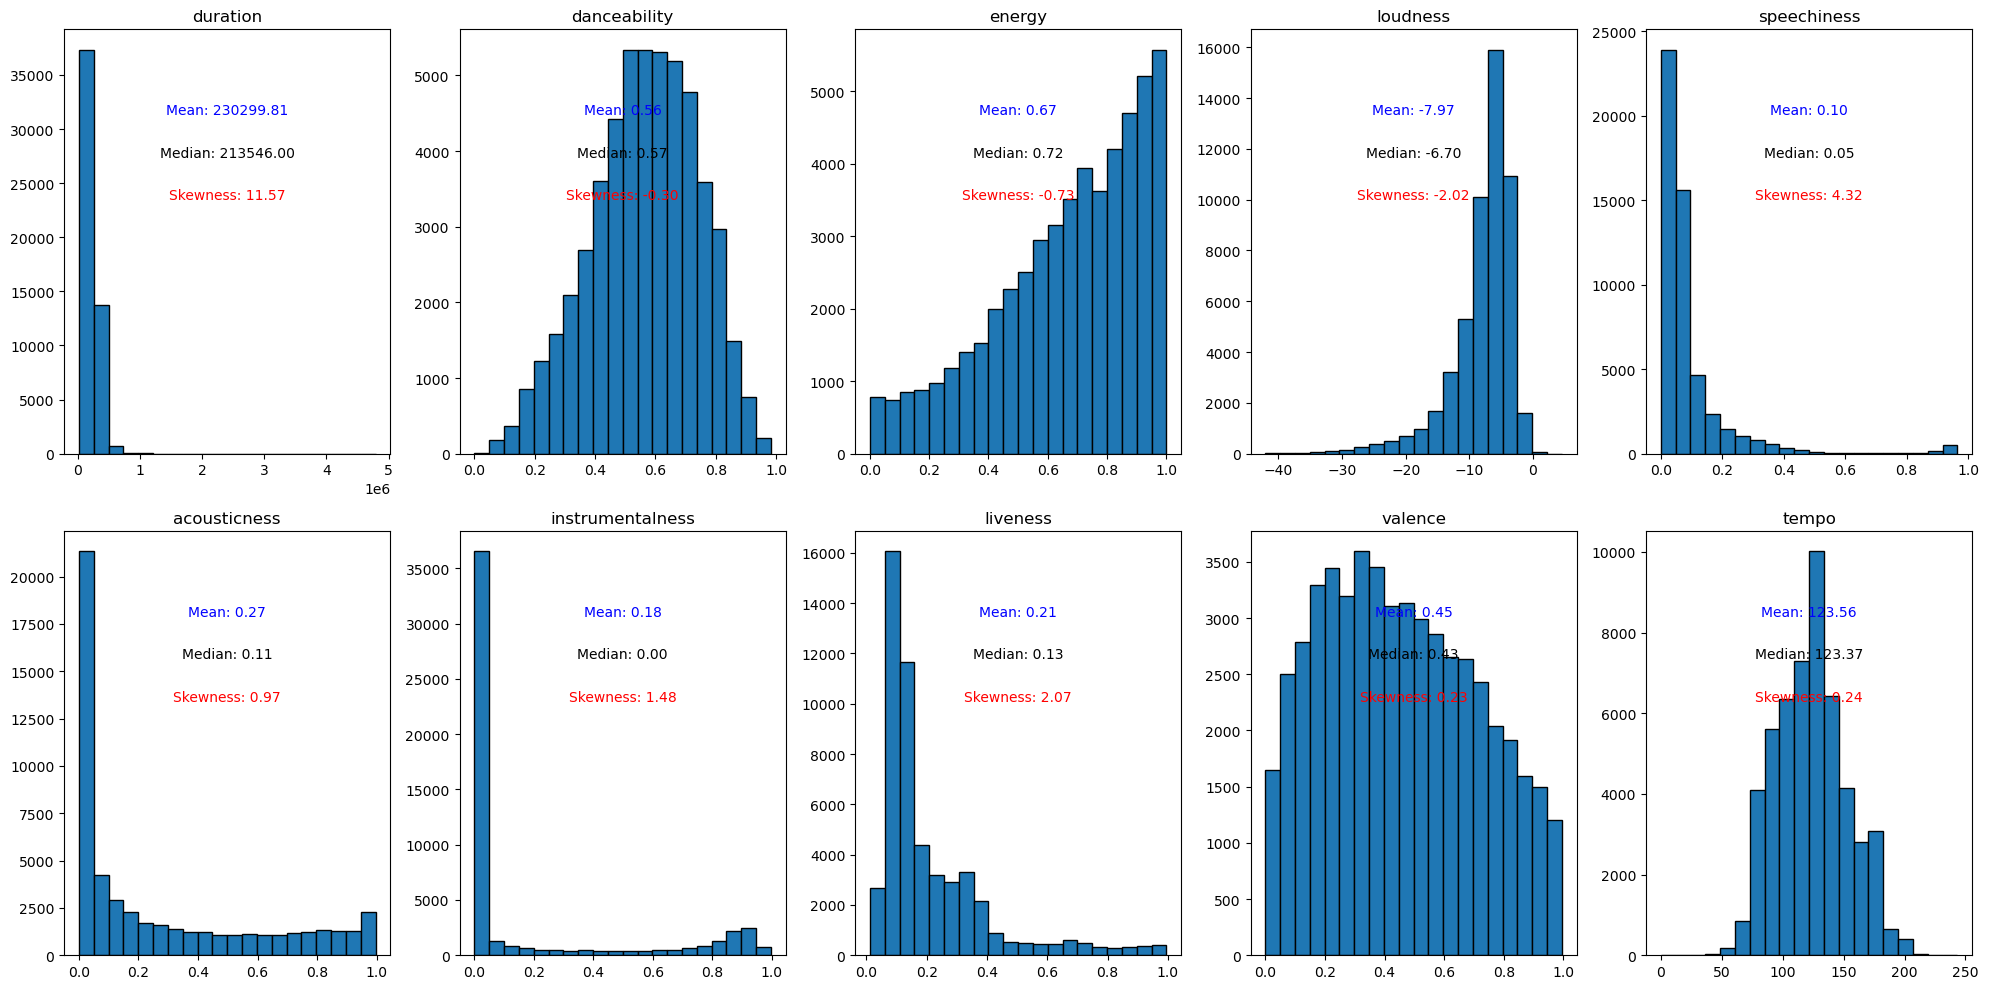

In [2]:
#Question 1
import matplotlib.pyplot as plt

features = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
sub_df = df[features]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    axes[i].hist(sub_df[feature],bins=20,edgecolor='black')
    axes[i].set_title(feature)
    mean_val = sub_df[feature].mean()
    median_val = sub_df[feature].median()
    skew_val = sub_df[feature].skew()
    axes[i].text(0.5, 0.8, f"Mean: {mean_val:.2f}", transform=axes[i].transAxes,ha='center', fontsize=10, color='blue')
    axes[i].text(0.5, 0.7, f"Median: {median_val:.2f}", transform=axes[i].transAxes,ha='center', fontsize=10, color='black')
    axes[i].text(0.5, 0.6, f"Skewness: {skew_val:.2f}", transform=axes[i].transAxes,ha='center', fontsize=10, color='red')
plt.tight_layout()
plt.show()

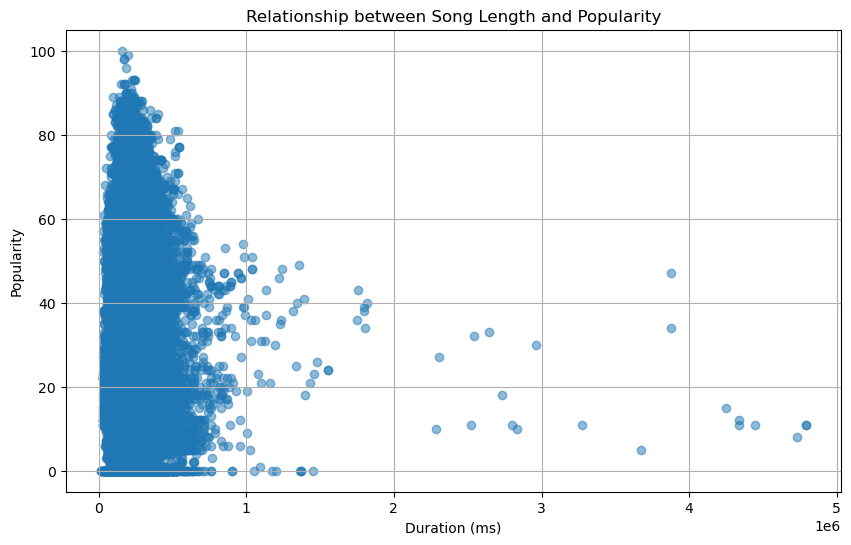

Pearson Correlation Coefficient: -0.0547
Spearman Correlation Coefficient: -0.0373


In [3]:
#Question 2
sub_df = df[['duration', 'popularity']]

plt.figure(figsize=(10, 6))
plt.scatter(sub_df['duration'], sub_df['popularity'], alpha=0.5)
plt.title('Relationship between Song Length and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()
corr_coeff = df['duration'].corr(df['popularity'])
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
spearman_coeff = df['duration'].corr(df['popularity'], method='spearman')
print(f"Spearman Correlation Coefficient: {spearman_coeff:.4f}")

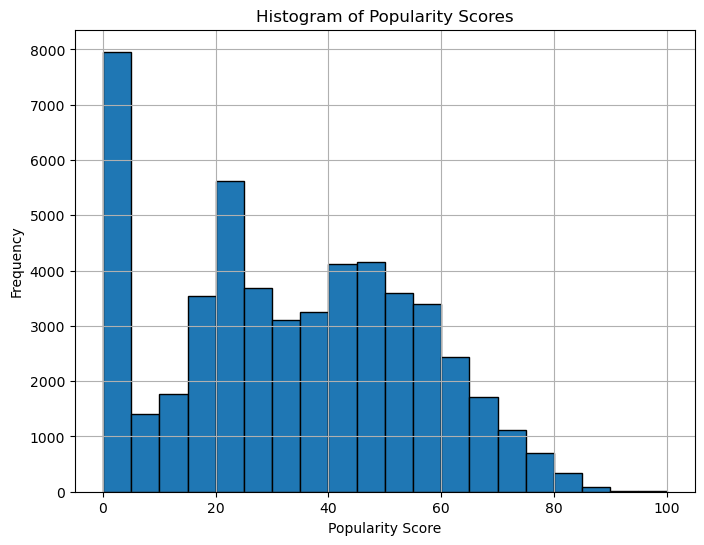

In [4]:
#Question 3
import numpy as np

popularity_scores = df['popularity']

plt.figure(figsize=(8, 6))
plt.hist(popularity_scores, bins=20, edgecolor='black')
plt.title('Histogram of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

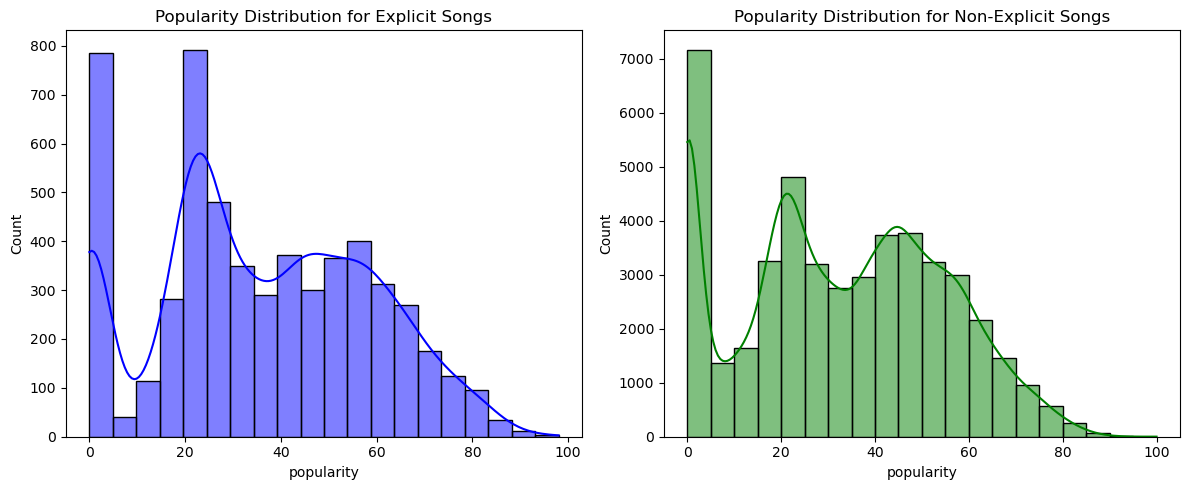

In [5]:
#Question 3 and 4
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df[df['explicit'] == True]['popularity'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Popularity Distribution for Explicit Songs')
sns.histplot(df[df['explicit'] == False]['popularity'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Popularity Distribution for Non-Explicit Songs')
plt.tight_layout()
plt.show()

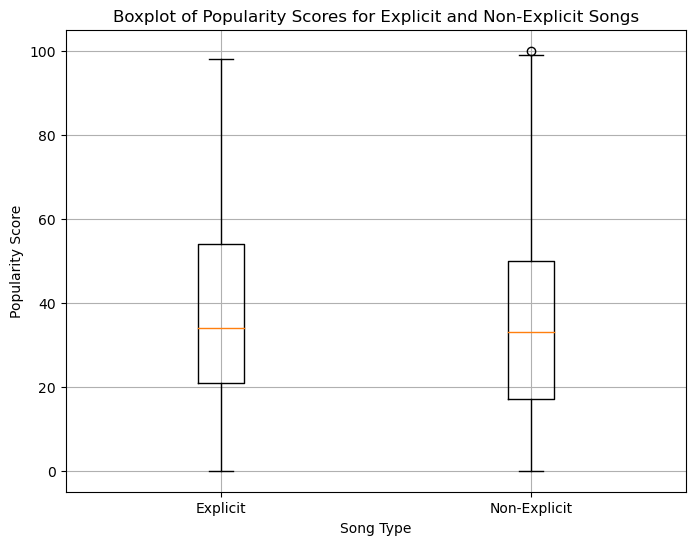

In [6]:
#Question 3
explicit_songs = df[df['explicit'] == True]['popularity']
non_explicit_songs = df[df['explicit'] == False]['popularity']

plt.figure(figsize=(8, 6))
plt.boxplot([explicit_songs, non_explicit_songs], labels=['Explicit', 'Non-Explicit'])
plt.title('Boxplot of Popularity Scores for Explicit and Non-Explicit Songs')
plt.xlabel('Song Type')
plt.ylabel('Popularity Score')
plt.grid(True)
plt.show()

In [7]:
#Question 3
from scipy.stats import mannwhitneyu

u, u_p = mannwhitneyu(explicit_songs, non_explicit_songs)
print("U-statistic:", u)
print("p-value:", u_p)
print()
if u_p < 0.05:
    print("Statistically significant")
else:
    print("Not statistically significant")

U-statistic: 139361273.5
p-value: 3.0679199339114678e-19

Statistically significant


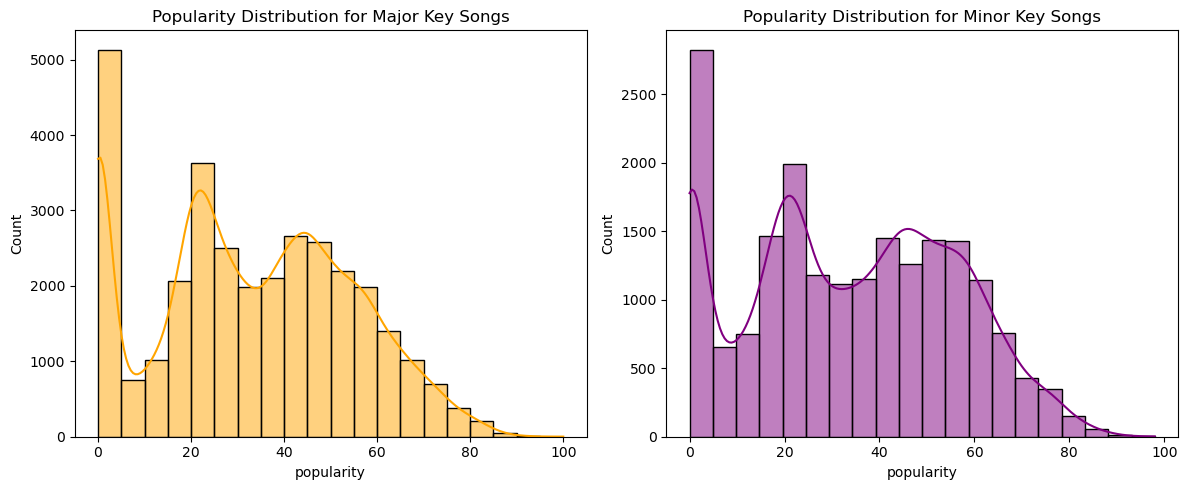

In [8]:
#Question 4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df[df['mode'] == 1]['popularity'], bins=20, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Popularity Distribution for Major Key Songs')
sns.histplot(df[df['mode'] == 0]['popularity'], bins=20, kde=True, color='purple', ax=axes[1])
axes[1].set_title('Popularity Distribution for Minor Key Songs')
plt.tight_layout()
plt.show()

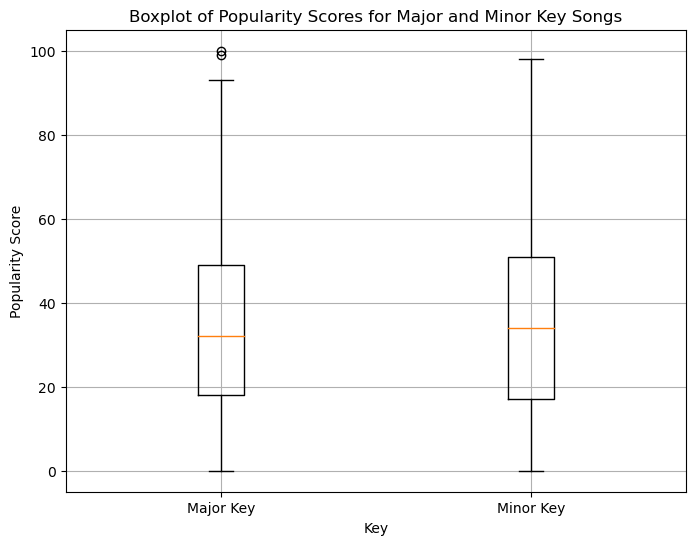

In [9]:
#Question 4
major_songs = df[df['mode'] == 1]['popularity']
minor_songs = df[df['mode'] == 0]['popularity']

plt.figure(figsize=(8, 6))
plt.boxplot([major_songs, minor_songs], labels=['Major Key', 'Minor Key'])
plt.title('Boxplot of Popularity Scores for Major and Minor Key Songs')
plt.xlabel('Key')
plt.ylabel('Popularity Score')
plt.grid(True)
plt.show()

In [10]:
#Question 4

u, u_p = mannwhitneyu(major_songs, minor_songs)
print("U-statistic:", u)
print("p-value:", u_p)
print()
if u_p < 0.05:
    print("Statistically significant")
else:
    print("Not statistically significant")

U-statistic: 309702373.0
p-value: 2.0175287554899416e-06

Statistically significant


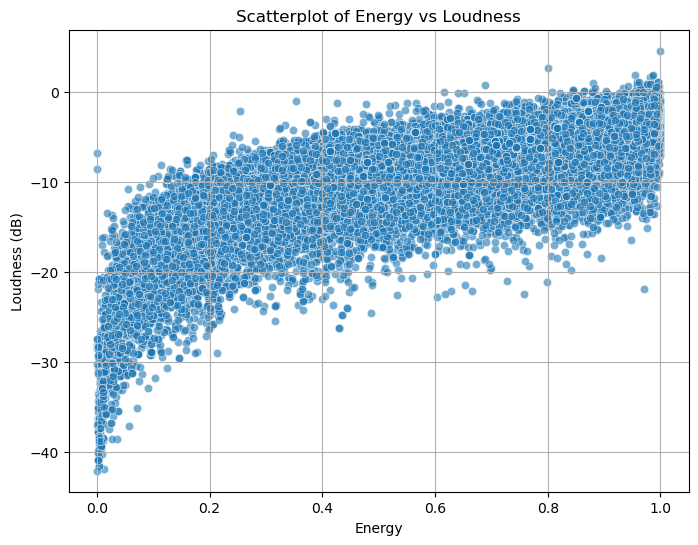

0.774880829185019


In [11]:
#Question 5
energy = df['energy']
loudness = df['loudness']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=energy, y=loudness, alpha=0.6)
plt.title('Scatterplot of Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.grid(True)
plt.show()

print(energy.corr(loudness))

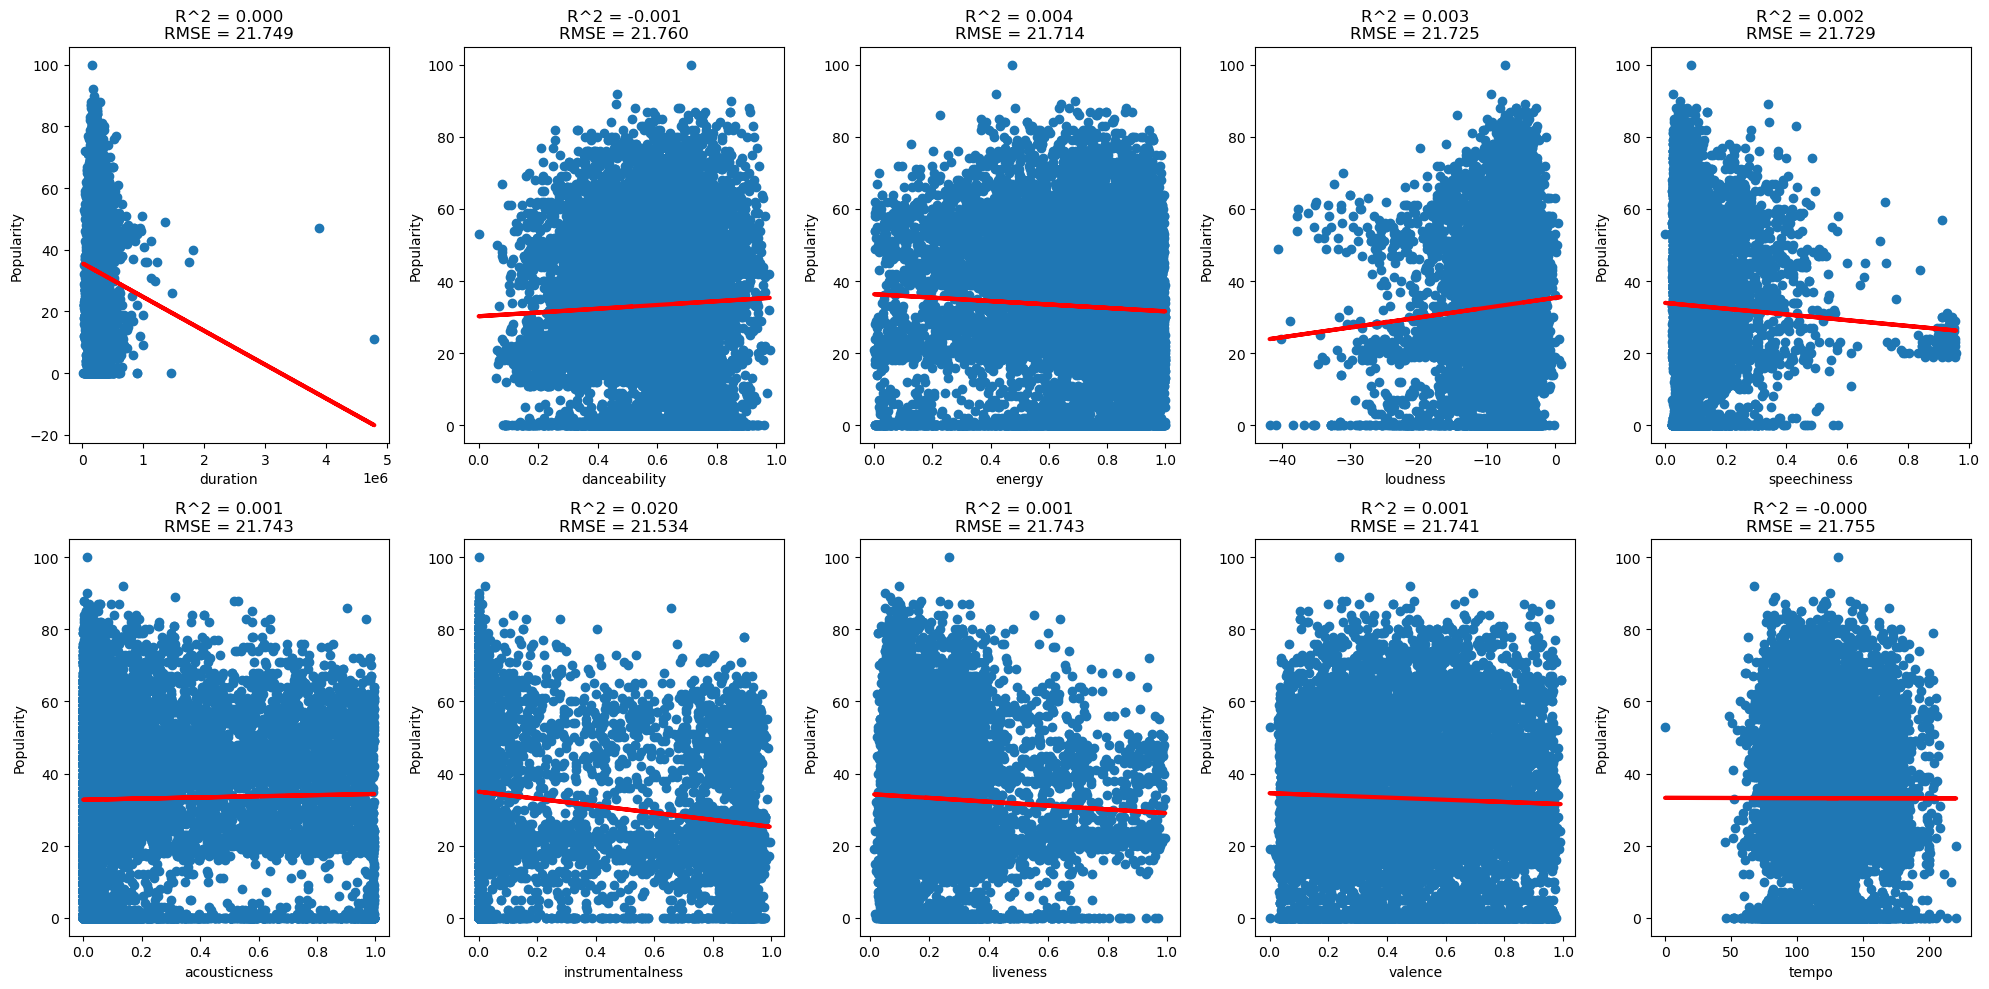

Best Predictive Feature: instrumentalness
R-squared: 0.020116718580226456
RMSE:  21.53363668962516


In [12]:
#Question 6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X = df[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

best_feature = None
best_r_squared = -1
best_rmse = float('inf')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, val in enumerate(X.columns):
    feature = X[[val]]
    X_train, X_test, y_train, y_test = train_test_split(feature,y,test_size=0.2,random_state=14861251)
    model = LinearRegression()
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    r_squared = r2_score(y_test,preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_rmse = rmse
        best_feature = val
        
    axes[i].scatter(X_test, y_test)
    axes[i].plot(X_test, preds, color='red', linewidth=3)
    title = 'R^2 = {:.3f}'.format(r_squared) + '\n' + 'RMSE = {:.3f}'.format(rmse)
    axes[i].set_title(title)
    axes[i].set_xlabel(val)
    axes[i].set_ylabel('Popularity')
    
plt.tight_layout()
plt.show()

print("Best Predictive Feature:", best_feature)
print("R-squared:", best_r_squared)
print("RMSE: ",best_rmse)

R-squared using all features: 0.04194694621716244
RMSE using all features: 21.29241819088791


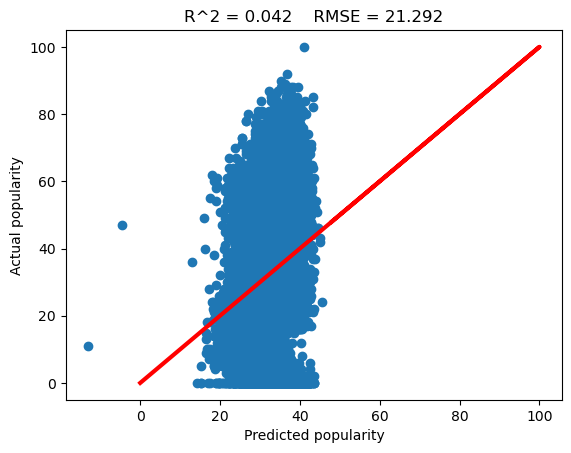

In [13]:
#Question 7
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=14861251)

model_all = LinearRegression()
model_all.fit(X_train, y_train)
preds = model_all.predict(X_test)
r_squared_all = r2_score(y_test, preds)
rmse_all = np.sqrt(mean_squared_error(y_test, preds))

print("R-squared using all features:", r_squared_all)
print("RMSE using all features:", rmse_all)

plt.scatter(preds, y_test)
plt.plot(y_test, y_test, color='red', linewidth=3)
plt.title('R^2 = {:.3f}'.format(r_squared_all) + '    ' + 'RMSE = {:.3f}'.format(rmse_all))
plt.xlabel('Predicted popularity')
plt.ylabel('Actual popularity')
plt.show()

Explained Variance:
Principal Components 1: 27.3388
Principal Components 2: 16.1736
Principal Components 3: 13.8458
Principal Components 4: 9.7959
Principal Components 5: 8.7521
Principal Components 6: 8.1483
Principal Components 7: 6.7827
Principal Components 8: 4.7157
Principal Components 9: 3.1313
Principal Components 10: 1.3158


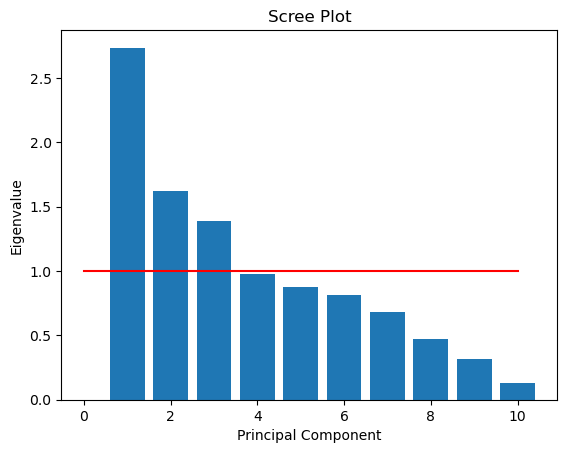

In [14]:
#Question 8
from sklearn.decomposition import PCA
from scipy.stats import zscore

X = df[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
X_std = zscore(X)
pca = PCA().fit(X_std)
eigen_vals = pca.explained_variance_
loadings = pca.components_
principal_components = pca.fit_transform(X_std)

explained_variance = eigen_vals/sum(eigen_vals)*100
print("Explained Variance:")
for i, ratio in enumerate(explained_variance):
    print(f"Principal Components {i+1}: {ratio:.4f}")
    

plt.bar(np.linspace(1,10,10), eigen_vals)
plt.plot([0,10],[1,1],color='red')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

Number of meaningful principal components (eigenvalue > 1): 3


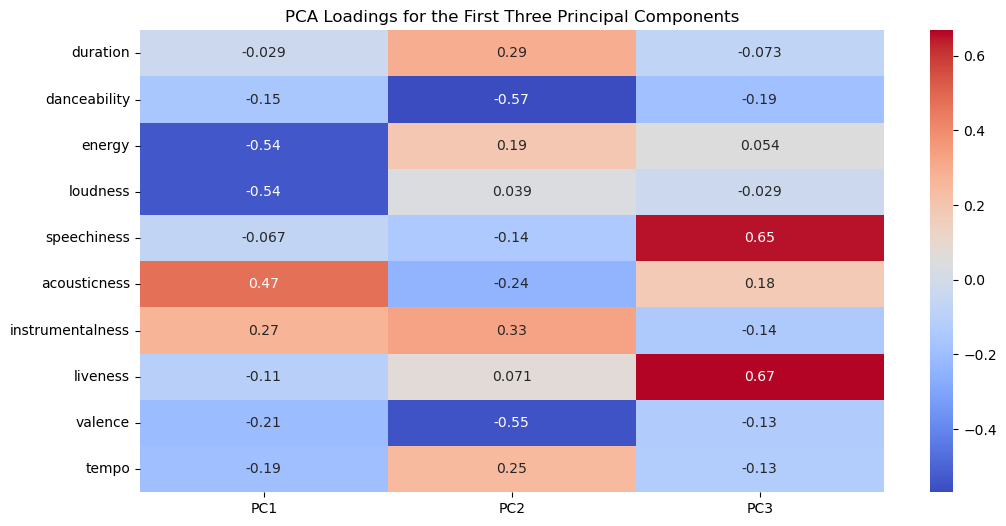

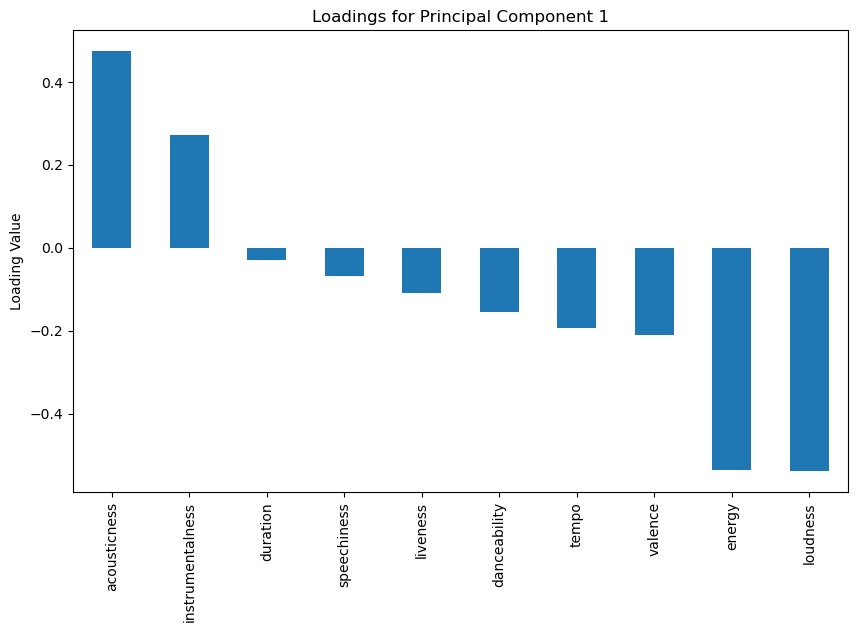

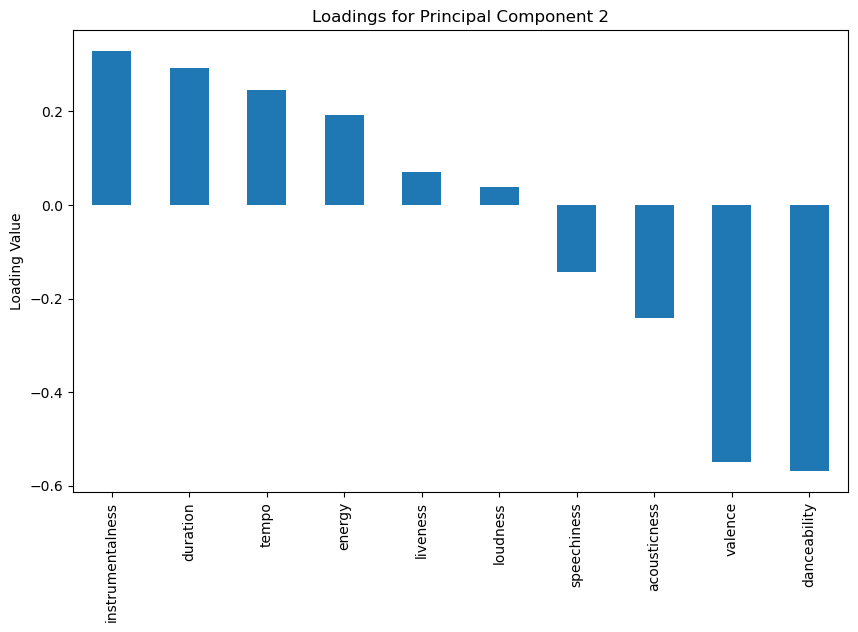

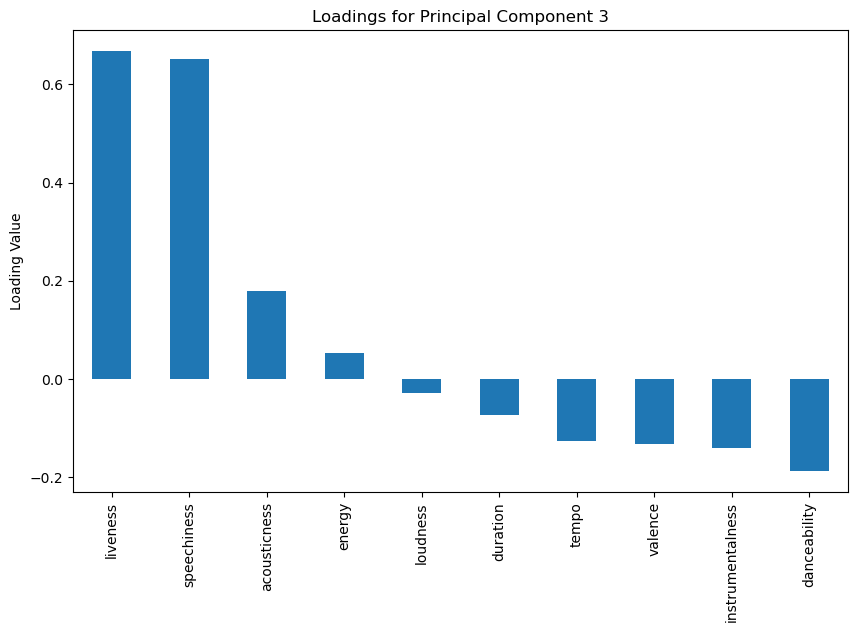

In [15]:
#Question 8
num_components = sum(eigen_vals > 1)
print(f"Number of meaningful principal components (eigenvalue > 1): {num_components}")

loadings = pca.components_[:num_components]
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(num_components)], index=features)

plt.figure(figsize=(12, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings for the First Three Principal Components')
plt.show()

for i in range(num_components):
    plt.figure(figsize=(10, 6))
    loading_df[f'PC{i+1}'].sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Loadings for Principal Component {i+1}')
    plt.ylabel('Loading Value')
    plt.show()

Accuracy: 0.6241346153846153


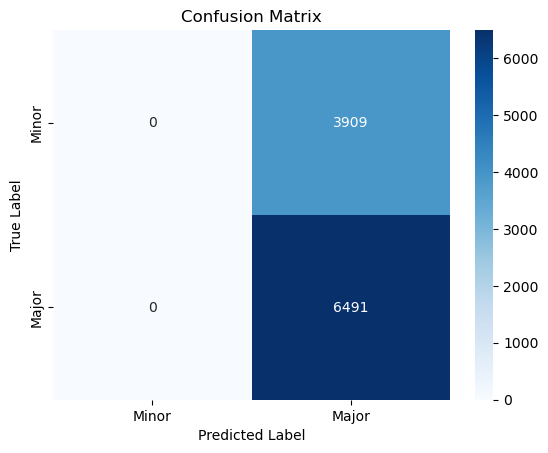

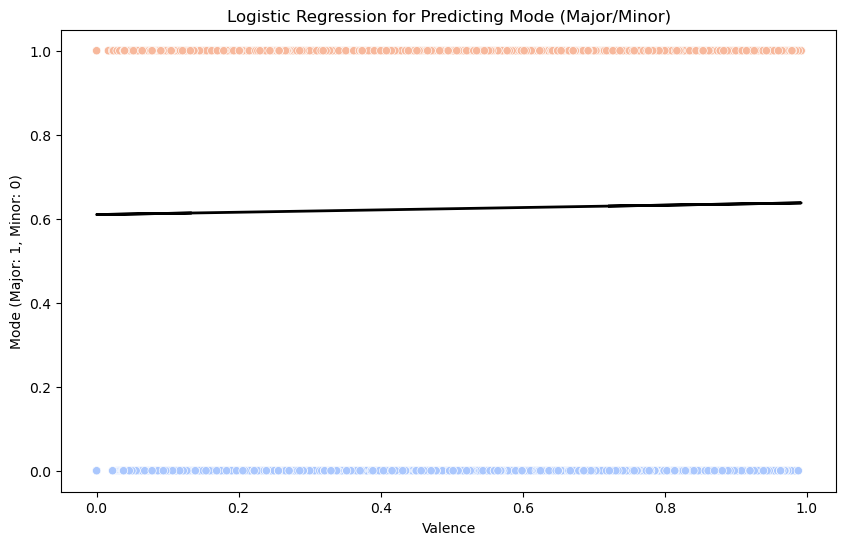

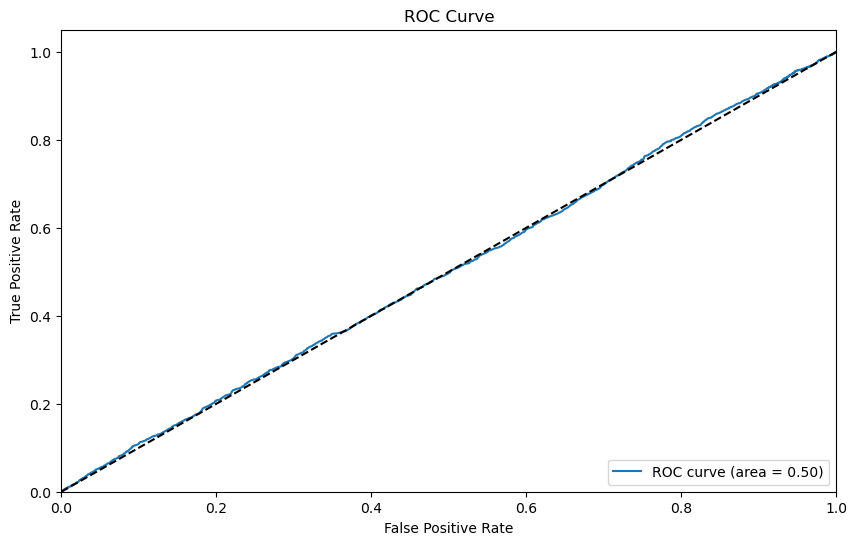

AUC: 0.50


In [16]:
#Question 9
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

X = df[['valence']]
y = df['mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14861251)
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
proba_preds = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)
conf_matrix = confusion_matrix(y_test, preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Major'], yticklabels=['Minor', 'Major'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

roc_auc = roc_auc_score(y_test, proba_preds)
fpr, tpr, thresholds = roc_curve(y_test, proba_preds)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['valence'], y=y_test, hue=y_test, palette='coolwarm', legend=False)
plt.plot(X_test, proba_preds, color='black', linewidth=2)
plt.xlabel('Valence')
plt.ylabel('Mode (Major: 1, Minor: 0)')
plt.title('Logistic Regression for Predicting Mode (Major/Minor)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')

In [17]:
#Question 9
mode_counts = df['mode'].value_counts()
print("Mode Distribution:")
print(mode_counts)

Mode Distribution:
mode
1    32391
0    19609
Name: count, dtype: int64


Accuracy: 0.6241346153846153

Confusion Matrix:


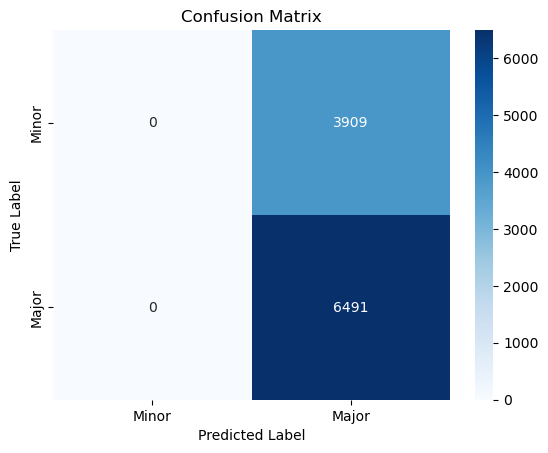

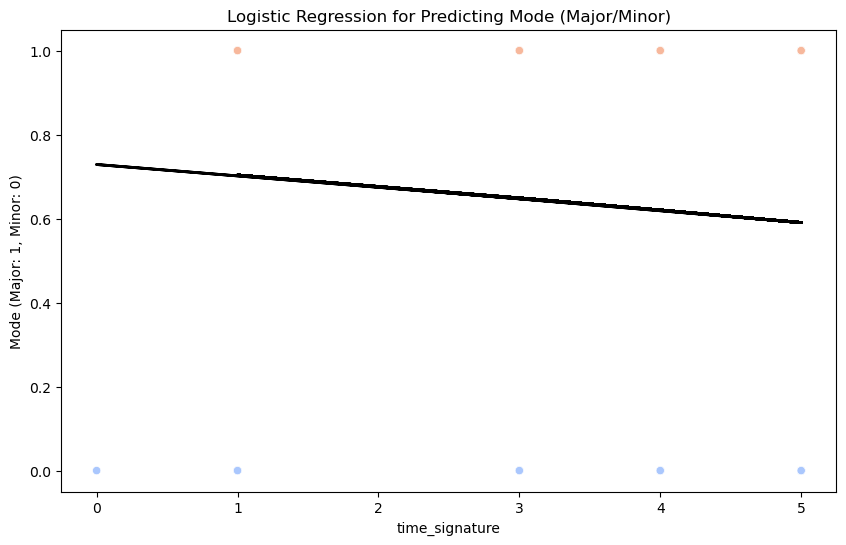

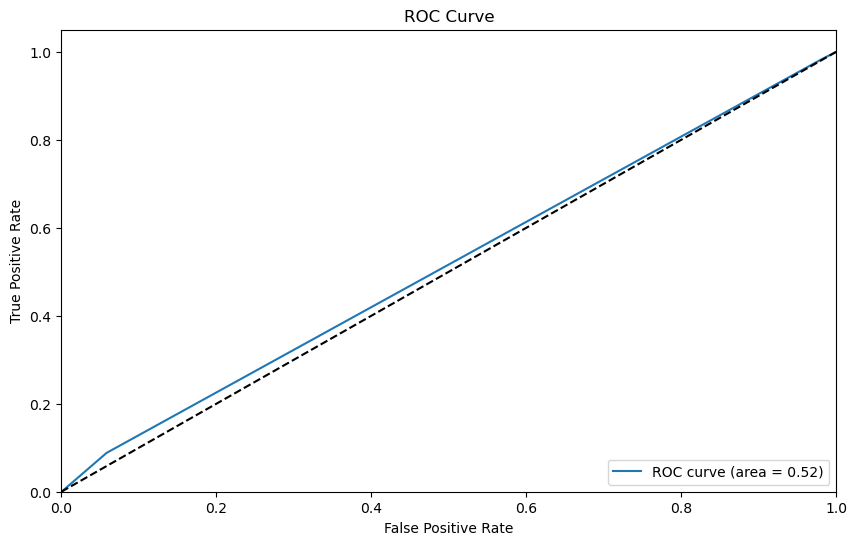

AUC: 0.52


In [18]:
#Question 9
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
feature = 'time_signature'
X = df[[feature]]
y = df['mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14861251)
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
proba_preds = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Major'], yticklabels=['Minor', 'Major'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

roc_auc = roc_auc_score(y_test, proba_preds)
fpr, tpr, thresholds = roc_curve(y_test, proba_preds)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[feature], y=y_test, hue=y_test, palette='coolwarm', legend=False)
plt.plot(X_test, proba_preds, color='black', linewidth=2)
plt.xlabel(feature)
plt.ylabel('Mode (Major: 1, Minor: 0)')
plt.title('Logistic Regression for Predicting Mode (Major/Minor)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')

In [19]:
#Question 10
df['classical'] = df['track_genre'].apply(lambda x: 1 if x == 'classical' else 0)

X = df[['duration']]
y = df['classical']
pca_1 = principal_components[:,0]*-1
pca_2 = principal_components[:,1]*-1
pca_3 = principal_components[:,2]*-1
X_pca = np.column_stack((pca_1, pca_2, pca_3))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14861251)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=14861251)

model_duration = LogisticRegression()
model_duration.fit(X_train, y_train)
duration_preds = model_duration.predict(X_test)
duration_proba_preds = model_duration.predict_proba(X_test)[:,1]

print("Model based on duration:")
print('Accuracy: ',accuracy_score(y_test,duration_preds))
print('Confusion matrix:')
print(confusion_matrix(y_test, duration_preds))


model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)
pca_preds = model_pca.predict(X_test_pca)
pca_proba_preds = model_pca.predict_proba(X_test_pca)[:,1]

print("Model based on PCA:")
print('Accuracy: ',accuracy_score(y_test_pca,pca_preds))
print('Confusion matrix:')
print(confusion_matrix(y_test_pca, pca_preds))

Model based on duration:
Accuracy:  0.9817307692307692
Confusion matrix:
[[10210     0]
 [  190     0]]
Model based on PCA:
Accuracy:  0.979326923076923
Confusion matrix:
[[10175    35]
 [  180    10]]


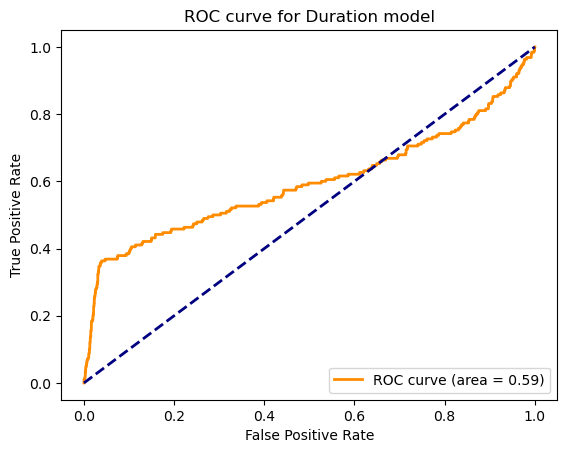

AUC score: 0.5949943296046187


In [20]:
#Question 10
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, duration_proba_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Duration model')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

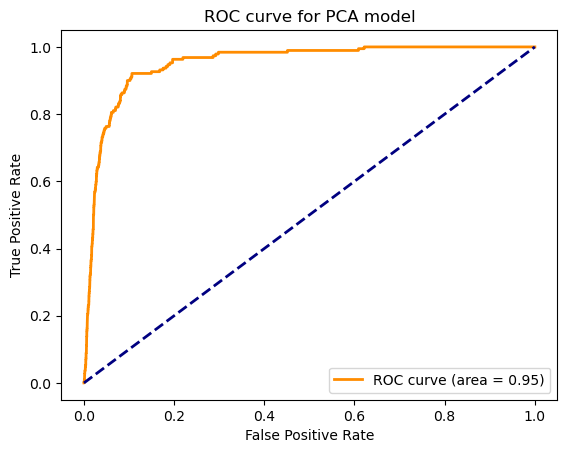

AUC score: 0.9514493015103871


In [21]:
#Question 10
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pca_proba_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for PCA model')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

In [22]:
#Question 10
classical_songs = df[df['track_genre'] == 'classical']
non_classical_songs = df[df['track_genre'] != 'classical']
print(classical_songs.shape[0])
print(non_classical_songs.shape[0])

1000
51000


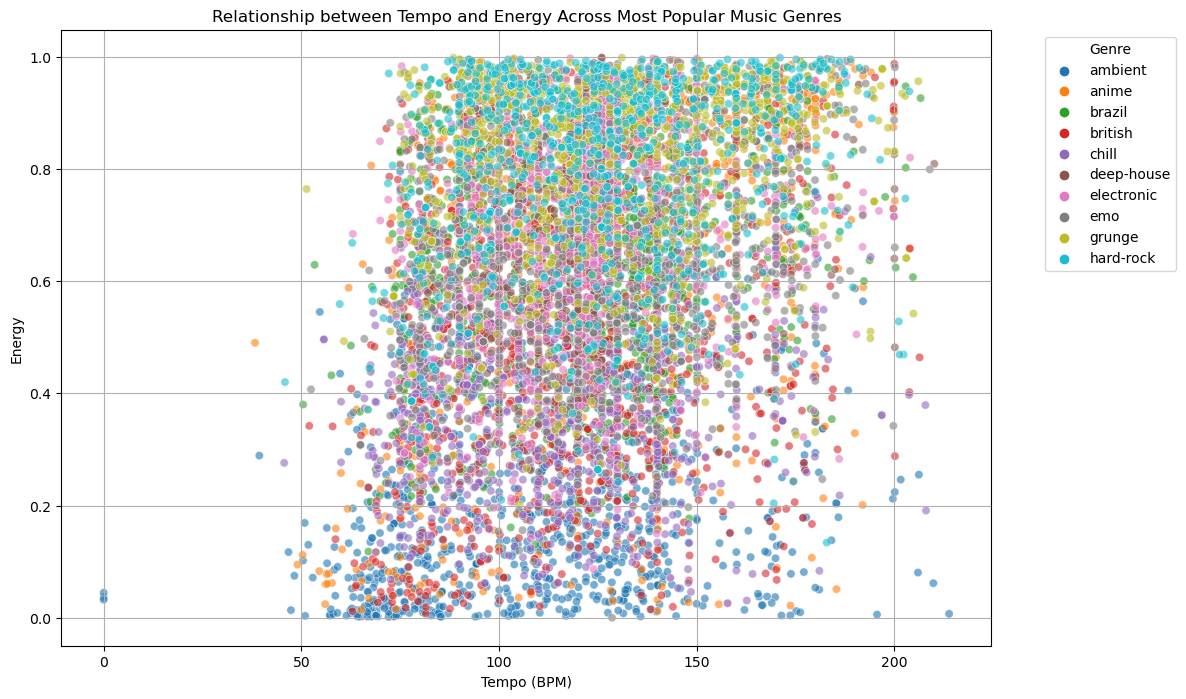

In [23]:
#Extra Credit
avg_pop_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
most_popular_genres = avg_pop_genre.head(10).index.tolist()
sub_df = df[df['track_genre'].isin(most_popular_genres)]
genre = sub_df['track_genre']
tempo = sub_df['tempo']
energy = sub_df['energy']

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tempo, y=energy, hue=genre, palette='tab10', alpha=0.6)
plt.title('Relationship between Tempo and Energy Across Most Popular Music Genres')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()